In [1]:
# ----------- Converts raw dataset into  dataset(s) ready for model to build on ----------------


import numpy as np
import pandas as pd
import datetime

# For Visualisation
import seaborn as sns
import matplotlib.pyplot as plt


# For Wheather API
import datetime
import requests # ----------  Python library used to make HTTP requests.


data = pd.read_csv("Final_Raw_Dataset.csv")
data.head(10)

# -- NOTE: the Species and their respcetive number (via encoding ) is stored
# in a separate dataframe called sp_index

,Date,Name of Species,Small (in Rs.),Medium (in Rs.),Large (in Rs.)
0,1/1/2022,Asian Seabass,804.11,0.0,0.0
1,1/1/2022,Big eye trevally,639.48,0.0,0.0
2,1/1/2022,Black barred half beak,701.09,0.0,0.0
3,1/1/2022,Black pomfret,788.99,0.0,0.0
4,1/1/2022,Blue Swimming Crab,776.08,0.0,0.0
5,1/1/2022,Bombay duck,388.22,0.0,0.0
6,1/1/2022,Flower tail prawn,733.48,0.0,0.0
7,1/1/2022,Four finger thread fin,680.14,0.0,0.0
8,1/1/2022,Frigate tuna,492.64,0.0,0.0
9,1/1/2022,Giant catfish,650.83,0.0,0.0


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33131 entries, 0 to 33130
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             33131 non-null  object 
 1   Name of Species  33131 non-null  object 
 2   Small (in Rs.)   30235 non-null  float64
 3   Medium (in Rs.)  22558 non-null  float64
 4   Large (in Rs.)   21986 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.3+ MB


In [4]:
data.shape

(33131, 5)

In [5]:
data.isnull().sum()

Date                   0
Name of Species        0
Small (in Rs.)      2896
Medium (in Rs.)    10573
Large (in Rs.)     11145
dtype: int64

In [6]:
#-------- TARGET COLUMNS: Small (in Rs.)	Medium (in Rs.)	Large (in Rs.)-------

# Dealing with NaN in The 3 columns of price

data['Medium (in Rs.)'] = data['Medium (in Rs.)'].fillna(0.0)
data['Large (in Rs.)'] = data['Large (in Rs.)'].fillna(0.0)
data['Small (in Rs.)'] = data['Small (in Rs.)'].fillna(0.0)



print('Large :',data['Large (in Rs.)'].unique())
print('Medium :',data['Medium (in Rs.)'].unique())
print('Small :',data['Small (in Rs.)'].unique())

Large : [   0. 1000.  280.  200.  604.  800.  220. 1200.   50.  250.  150.  260.
  600.   75.  900.  650.  320.  240.  300.  175.  120.  180.  160.  606.
 1050.  100.  400.  950.  330.  270.  230.   80.   98.  350.  500.  700.
  130.  340. 1100.  290.   95.  380.   85.  520.  420.   60.   90.  170.
  190.  560.  750.  850. 1250.  550.  620.  570.  450.  237.  432.  140.
  586.  128.  584.  360. 1150.  680.  430.  580.  585.  390.  142.  530.
   35.   20.   70.  310.  110.  135.  166.  210.   72.  276.  480.  125.
  563.  780.  139.  460.  590.  710.  490.  473. 1300. 2000.  225. 1800.
 1700.]
Medium : [   0.  330.  500.  390.  300.  930.  150.  280. 1030.  100.  430.  200.
  650.  340.  600.  550.  610.  240.  400.  360.  250.  120.   95.  320.
  350.  700.  160.  480. 1100.  450. 1000.  900.   60.  190.  530.  420.
  260.  440.  290.  380.  140. 1010.   50.  170. 1300.  130.   55.  460.
  620.  410.  180.  540.  310.  270.  800.   65.   40.  780. 1200.  680.
   30.  370.  115.   80.  

In [7]:
# ---- Data Transformation:  Convert the 3 columns for price based on size
# ---- Into 2 columns of Price and Size respectively


# Combine Small, Medium, Large prices into a single column
text = data[['Small (in Rs.)', 'Medium (in Rs.)', 'Large (in Rs.)']].astype(str).agg(','.join, axis=1)


# Function to extract size
def size_extraction(text):
    s, m, l = text.split(',')
    if s != '0.0':
        return 1
    elif m != '0.0':
        return 2
    elif l != '0.0':
        return 3
    return None  # Fallback in case of unexpected input



# Function to extract price
def price_extraction(text):
    sz = size_extraction(text)
    s, m, l = text.split(',')

    # Return the price associated to correct size for each entry (via text)
    if sz == 1:
        return float(s)

    elif sz == 2:
            return float(m)

    elif sz == 3:
            return float(l)

    return None #failsafe



# Apply the functions
data['size'] = text.apply(size_extraction)
data['price'] = text.apply(price_extraction)



In [8]:
#-------- TARGET COLUMN: NAME OF SPECIES-------


# Rename species column
data['species'] = data['Name of Species']


# Converting Species from object to string and normalizing values
data['species'] = data['species'].astype('string')


data['species'] = data['species'].str.lower().str.replace(' ', '_').str.replace('-', '_')

# Viewing Species data as list
unique_species = data['species'].unique().tolist()
for species in unique_species:
    print(species)


asian_seabass
big_eye_trevally
black_barred_half_beak
black_pomfret
blue_swimming_crab
bombay_duck
flower_tail_prawn
four_finger_thread_fin
frigate_tuna
giant_catfish
giant_tiger_prawn
gold_spot_mullet
gold_spotted_granadier_anchovy
greasy_grouper
green_mud_crab
grey_mullet
hound_needle_fish
indian_mackerel
indian_squid
indian_white_prawn
indo_pacific_seer_fish
japanese_threadfin_bream
jinga_prawn
john\'s_snapper
kiddi_shrimp
little_tuna
long_tail_tuna
malabar_anchovy
malabar_blood_snapper
malabar_grouper
narrow_barred_spanish_mackerel
pearl_spot
silver_pomfret
small_head_hairtail
spineless_cuttle_fish
spiny_cheek_grouper
spotted_crab
spotted_eagle_ray
zebra_danio
indian_featherback_or_chital
chocolate_mahseer
false_trevally
horse_mackerel
rohu
common_dolphin_fish
milk_shark
red_ring
big_eye_thresher
pool_barb
golden_mahseer
indian_nylon_shrimp
silver_carp
silver_belly
indian_scad
black_marlin
giant_snakehead
grass_carp
lesser_tigertooth_croaker
murrel
reba_carp
bronze_featherback
spad

In [9]:
# Drop unnecessary columns

data.drop(columns=['Name of Species', 'Small (in Rs.)', 'Medium (in Rs.)', 'Large (in Rs.)'], inplace=True)
data.dropna(subset=['price'], inplace=True)  # Ensure no missing values in price

In [10]:
# Encoding species and the days of a week to turn the categorical column into numerical

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# ---see note on first block
data['species_num'] = encoder.fit_transform(data['species'])
sp_index = list(zip(data['species'].unique(), data['species_num'].unique())) # Currently this is a list

sp_index = pd.DataFrame(sp_index, columns=['species', 'species_num'])  # Convert into Dataframe
sp_index = sp_index.set_index('species_num')


data.head()
sp_index.head()

,species
species_num,
0,asian_seabass
4,big_eye_trevally
7,black_barred_half_beak
9,black_pomfret
12,blue_swimming_crab


In [11]:
# To sort sp_index in descending order of the index
sorted_idx = sp_index.sort_index(ascending=True)

for idx in sorted_idx.index:
    print(f"{idx}: {sorted_idx.loc[idx, 'species']}")

sp_index.head()

0: asian_seabass
1: assamese_snake_head
2: bearded_croaker
3: big_eye_thresher
4: big_eye_trevally
5: big_eye_tuna
6: big_eyes
7: black_barred_half_beak
8: black_marlin
9: black_pomfret
10: black_rohu
11: black_tip_reef_shark
12: blue_swimming_crab
13: bombay_duck
14: bronze_featherback
15: brown_mussel
16: burmese_king_fish
17: carnatic_carp
18: catla
19: chocolate_mahseer
20: climbing_perch
21: cobia
22: commersons_glassy_perchlet
23: common_carp
24: common_dolphin_fish
25: false_trevally
26: flat_head_lobster
27: flower_tail_prawn
28: flowercrab
29: four_finger_thread_fin
30: frigate_tuna
31: fringed_lipped_peninsula_carp
32: giant_catfish
33: giant_freshwater_prawn
34: giant_guitar_fish
35: giant_snakehead
36: giant_tiger_prawn
37: gold_spot_mullet
38: gold_spotted_granadier_anchovy
39: golden_mahseer
40: granulated_guitar_fish
41: grass_carp
42: greasy_grouper
43: great_barracuda
44: greater_lizard_fish
45: green_mud_crab
46: green_mussel
47: green_snake_head
48: grey_mullet
49: h

,species
species_num,
0,asian_seabass
4,big_eye_trevally
7,black_barred_half_beak
9,black_pomfret
12,blue_swimming_crab


In [12]:
# Sorting the species index dataframe

sp_index = sp_index.sort_index(ascending=True)
sp_index.head()

,species
species_num,
0,asian_seabass
1,assamese_snake_head
2,bearded_croaker
3,big_eye_thresher
4,big_eye_trevally


In [13]:
#-------- TARGET COLUMN: DATE -------


# Converting date to DateTime datatype

data['date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')

data = data.drop(columns = ['Date'])
data.sample(10)

,size,price,species,species_num,date
31359,1,692.75,green_mud_crab,45,2023-11-15
18170,1,408.89,pearl_spot,92,2022-12-03
22605,1,715.35,asian_seabass,0,2023-03-30
20466,1,559.52,little_tuna,73,2023-02-01
4783,1,305.41,small_head_hairtail,113,2022-05-06
20487,1,1162.56,indo_pacific_seer_fish,65,2023-02-02
15919,1,650.00,long_tail_tuna,74,2022-10-04
14034,1,280.00,black_pomfret,9,2022-08-27
2676,1,603.18,hound_needle_fish,51,2022-03-12
11672,1,100.00,indian_nylon_shrimp,57,2022-08-08


In [14]:
#-------- EXPORTING CURRENT DATASET FOR THE VISUALISATION ABOVE( PICKLE FILE)-------

import pickle

# Exports the chosen files, objects, etc into Jupyter folder and Documents

pickle.dump(data,open('OG_data_Cleansed_No_Index.pkl', 'wb'))  # Dataset
pickle.dump(sp_index,open('species_index.pkl', 'wb'))  # Species with name for index after encoding


#-------- EXPORTING CURRENT DATASET FOR VISUALISATIONS (EXCEL CSV FILE)-------

data.to_csv('OG_data_Cleansed_No_Index.csv', index=True)
sp_index.to_csv('species_index.csv', index=True)

In [15]:
# Set date as index of data

data = data.set_index('date')
data.head()

,size,price,species,species_num
date,,,,
2022-01-01,1,804.11,asian_seabass,0
2022-01-01,1,639.48,big_eye_trevally,4
2022-01-01,1,701.09,black_barred_half_beak,7
2022-01-01,1,788.99,black_pomfret,9
2022-01-01,1,776.08,blue_swimming_crab,12


In [17]:
data = data.drop(columns = ['species'])

In [18]:
data.sample(20)

,size,price,species_num
date,,,
2022-03-05,1,1156.39,65
2022-01-27,1,332.29,13
2023-06-26,1,576.66,116
2022-08-30,1,300.00,92
2023-07-03,1,493.46,37
2022-07-21,3,20.00,85
2022-05-22,1,657.32,73
2023-03-13,1,540.93,77
2023-06-24,1,1131.36,65


In [19]:
#-------- TARGET COLUMN: PRICE -------

# Converting price into string to remove spaces
data['price'] = data['price'].astype('string')
data['price'] = data['price'].str.strip()

# Converting price to float
data['price'] = data['price'].astype('float')


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33131 entries, 2022-01-01 to 2023-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   size         33131 non-null  int64  
 1   price        33131 non-null  float64
 2   species_num  33131 non-null  int32  
dtypes: float64(1), int32(1), int64(1)
memory usage: 905.9 KB


In [21]:
#-------------- FEATURE ADDITION/CREATION: DATE-BASED FEATURES -----------------------

# Adding a columns to assist Model (Feature Creation) - Create time series features based on time series index.


def create_features(data):

    data = data.copy()
    data['dayofweek'] = data.index.dayofweek  # Monday-0, Sunday-6
    data['quarter'] = data.index.quarter
    data['month'] = data.index.month
    data['year'] = data.index.year
    data['dayofyear'] = data.index.dayofyear
    data['dayofmonth'] = data.index.day
    data['weekofyear'] = data.index.isocalendar().week
    return data

data = create_features(data)

data.info()
data.sample(10)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33131 entries, 2022-01-01 to 2023-12-31
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   size         33131 non-null  int64  
 1   price        33131 non-null  float64
 2   species_num  33131 non-null  int32  
 3   dayofweek    33131 non-null  int32  
 4   quarter      33131 non-null  int32  
 5   month        33131 non-null  int32  
 6   year         33131 non-null  int32  
 7   dayofyear    33131 non-null  int32  
 8   dayofmonth   33131 non-null  int32  
 9   weekofyear   33131 non-null  UInt32 
dtypes: UInt32(1), float64(1), int32(7), int64(1)
memory usage: 1.8 MB


,size,price,species_num,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,,
2022-02-23,1,555.96,37,2,1,2,2022,54,23,8
2022-08-06,2,500.00,80,5,3,8,2022,218,6,31
2023-10-18,1,359.66,56,2,4,10,2023,291,18,42
2022-02-02,1,532.68,78,2,1,2,2022,33,2,5
2022-01-08,1,445.02,92,5,1,1,2022,8,8,1
2023-05-23,1,485.97,36,1,2,5,2023,143,23,21
2023-11-16,1,424.50,30,3,4,11,2023,320,16,46
2023-05-14,1,841.94,9,6,2,5,2023,134,14,19
2023-11-04,1,431.82,92,5,4,11,2023,308,4,44


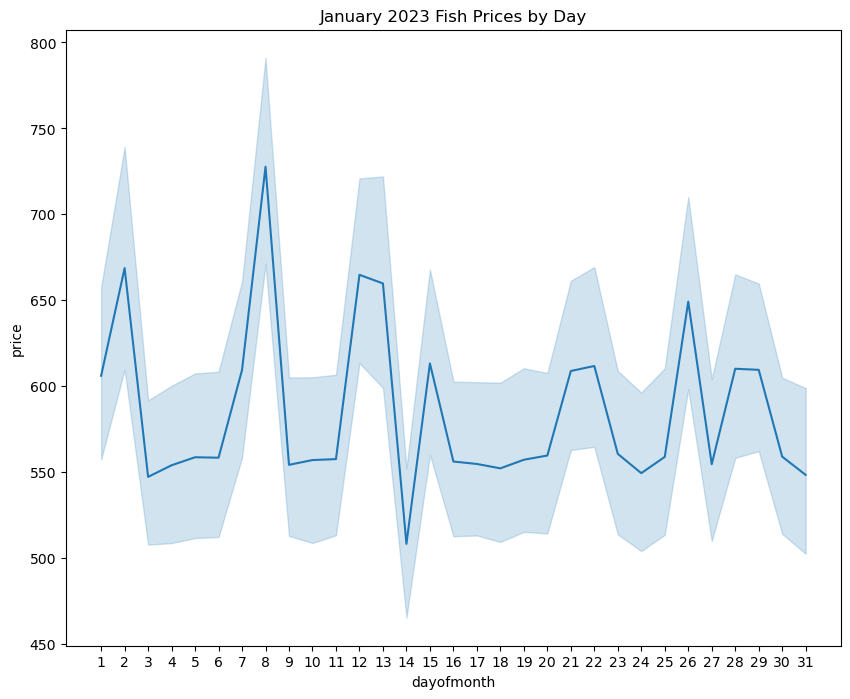

In [22]:
# -------------- VISUALIZATIONS ------------

# Data analysis by viewing it per month

# Filter data for January 2023 using index (if date is set as index)
jan_2023 = data[(data.index.month == 1) & (data.index.year == 2023)]

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(data=jan_2023, x='dayofmonth', y='price', ax=ax)

ax.set_title('January 2023 Fish Prices by Day')
ax.set_xticks(range(1, 32))  # Days 1 to 31

# plt.tight_layout()
plt.show()

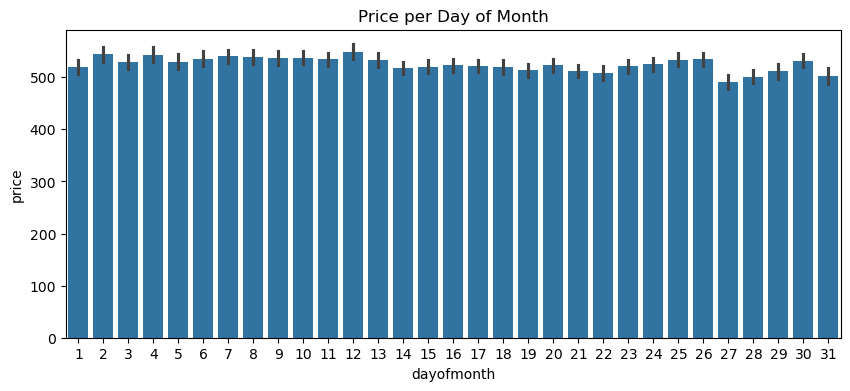

In [23]:
# -------------- VISUALIZATIONS ------------

# Visualising movement/pattern of data as per new columns added.

fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(data=data, x='dayofmonth', y='price')
ax.set_title('Price per Day of Month')
plt.show()

In [24]:
#---------------WEATHER DATA ADDITION ATTEMPT - OPEN METEO API --------


!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 52.52,
	"longitude": 13.41,
	"start_date": "2022-01-01",
	"end_date": "2023-12-31",
	"daily": ["temperature_2m_mean", "rain_sum"],
	"hourly": "relative_humidity_2m"

}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()}{response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_relative_humidity_2m = hourly.Variables(0).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}

hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m

hourly_Wdata = pd.DataFrame(data = hourly_data)

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_temperature_2m_mean = daily.Variables(0).ValuesAsNumpy()
daily_rain_sum = daily.Variables(1).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}

daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
daily_data["rain_sum"] = daily_rain_sum

daily_Wdata = pd.DataFrame(data = daily_data)

hourly_Wdata.head()


Coordinates 52.5483283996582°N 13.407821655273438°E
Elevation 38.0 m asl
Timezone NoneNone
Timezone difference to GMT+0 0 s


,date,relative_humidity_2m
0,2022-01-01 00:00:00+00:00,94.201561
1,2022-01-01 01:00:00+00:00,92.962036
2,2022-01-01 02:00:00+00:00,90.222160
3,2022-01-01 03:00:00+00:00,92.018913
4,2022-01-01 04:00:00+00:00,92.644432


In [25]:
hourly_Wdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   date                  17520 non-null  datetime64[ns, UTC]
 1   relative_humidity_2m  17520 non-null  float32            
dtypes: datetime64[ns, UTC](1), float32(1)
memory usage: 205.4 KB


In [26]:
# Checking for null values
hourly_Wdata.isnull().sum()

date                    0
relative_humidity_2m    0
dtype: int64

In [27]:
daily_Wdata.head()

,date,temperature_2m_mean,rain_sum
0,2022-01-01 00:00:00+00:00,10.841835,0.6
1,2022-01-02 00:00:00+00:00,9.618918,2.3
2,2022-01-03 00:00:00+00:00,8.058499,2.9
3,2022-01-04 00:00:00+00:00,5.964749,2.3
4,2022-01-05 00:00:00+00:00,3.562667,0.7


In [28]:
daily_Wdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   date                 730 non-null    datetime64[ns, UTC]
 1   temperature_2m_mean  730 non-null    float32            
 2   rain_sum             730 non-null    float32            
dtypes: datetime64[ns, UTC](1), float32(2)
memory usage: 11.5 KB


In [29]:
# Checking for null values
daily_Wdata.isnull().sum()

date                   0
temperature_2m_mean    0
rain_sum               0
dtype: int64

In [30]:
# --- CONVERTING HOURLY HUMIDITY INTO DAILY HUMIDITY

hourly_Wdata.set_index('date', inplace=True)

daily_avg = hourly_Wdata.resample('D').mean()
daily_avg = daily_avg.reset_index()

daily_hum = pd.DataFrame(data = daily_avg)
daily_hum.head()

daily_hum = daily_hum.reset_index()


In [31]:
# MERGE HUMIDITY TO DAILY WEATHERR DATASET
daily_Wdata = pd.merge(daily_hum, daily_Wdata, on='date', how='inner')

daily_Wdata.head()

,index,date,relative_humidity_2m,temperature_2m_mean,rain_sum
0,0,2022-01-01 00:00:00+00:00,93.101494,10.841835,0.6
1,1,2022-01-02 00:00:00+00:00,87.236244,9.618918,2.3
2,2,2022-01-03 00:00:00+00:00,82.711876,8.058499,2.9
3,3,2022-01-04 00:00:00+00:00,91.363457,5.964749,2.3
4,4,2022-01-05 00:00:00+00:00,83.859962,3.562667,0.7


In [32]:
# --- CHECKING VALUES OF WEATHER DATA, GIVING INDEX AND CHANGING NAMES

# We will rond off data via POWERBI or EXCEL

# Rename columns
daily_Wdata['mean_temp'] = daily_Wdata['temperature_2m_mean']
daily_Wdata['rain'] = daily_Wdata['rain_sum']
daily_Wdata['mean_humidity'] = daily_Wdata['relative_humidity_2m']

#Assign date as index
daily_Wdata = daily_Wdata.set_index('date')

# Sort by date
sorted_idx = daily_Wdata.sort_index()

# Display clean output
for idx in sorted_idx.index:
    clean_date = idx.strftime('%Y-%m-%d')  # Format the datetime
    row = sorted_idx.loc[idx, ['rain', 'mean_temp', 'mean_humidity']]
    print(f"{clean_date}: Rain = {row['rain']} mm, Temp = {row['mean_temp']} °C, Humidity = {row['mean_humidity']} %")



2022-01-01: Rain = 0.6000000238418579 mm, Temp = 10.841835021972656 °C, Humidity = 93.10149383544922 %
2022-01-02: Rain = 2.3000001907348633 mm, Temp = 9.618918418884277 °C, Humidity = 87.23624420166016 %
2022-01-03: Rain = 2.8999998569488525 mm, Temp = 8.058499336242676 °C, Humidity = 82.71187591552734 %
2022-01-04: Rain = 2.299999952316284 mm, Temp = 5.964748859405518 °C, Humidity = 91.36345672607422 %
2022-01-05: Rain = 0.699999988079071 mm, Temp = 3.562666893005371 °C, Humidity = 83.8599624633789 %
2022-01-06: Rain = 0.20000000298023224 mm, Temp = -0.19149993360042572 °C, Humidity = 83.17887115478516 %
2022-01-07: Rain = 0.6000000238418579 mm, Temp = 0.5960000157356262 °C, Humidity = 88.60662078857422 %
2022-01-08: Rain = 0.29999998211860657 mm, Temp = 0.41891658306121826 °C, Humidity = 91.42550659179688 %
2022-01-09: Rain = 0.4000000059604645 mm, Temp = 0.8855833411216736 °C, Humidity = 86.67300415039062 %
2022-01-10: Rain = 0.4000000059604645 mm, Temp = 2.3022499084472656 °C, Hum

In [33]:
# ADDING WEATHER DATA TO MAIN DATASET

# Step 1: Reset index to ensure 'date' is a column
data = data.reset_index()
daily_Wdata = daily_Wdata.reset_index()

# Step 2: Remove timezone from both date columns
daily_Wdata['date'] = daily_Wdata['date'].dt.tz_localize(None)
data['date'] = data['date'].dt.tz_localize(None)

# Step 3: Merge on 'date'
data = pd.merge(daily_Wdata[['date', 'mean_temp', 'mean_humidity', 'rain']],  # only needed cols
                data,
                on='date',
                how='inner')

# Step 4: Set date as index again (optional)
data.set_index('date', inplace=True)

# Step 5: (Optional) Drop duplicate or unwanted columns if needed
# data = data.drop(columns=['column_name'])

# Step 6: See the cleaned DataFrame
data.head()


,mean_temp,mean_humidity,rain,size,price,species_num,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,,,,,
2022-01-01,10.841835,93.101494,0.6,1,804.11,0,5,1,1,2022,1,1,52
2022-01-01,10.841835,93.101494,0.6,1,639.48,4,5,1,1,2022,1,1,52
2022-01-01,10.841835,93.101494,0.6,1,701.09,7,5,1,1,2022,1,1,52
2022-01-01,10.841835,93.101494,0.6,1,788.99,9,5,1,1,2022,1,1,52
2022-01-01,10.841835,93.101494,0.6,1,776.08,12,5,1,1,2022,1,1,52


C:\Users\aisha\AppData\Local\Temp\ipykernel_9384\2727194647.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

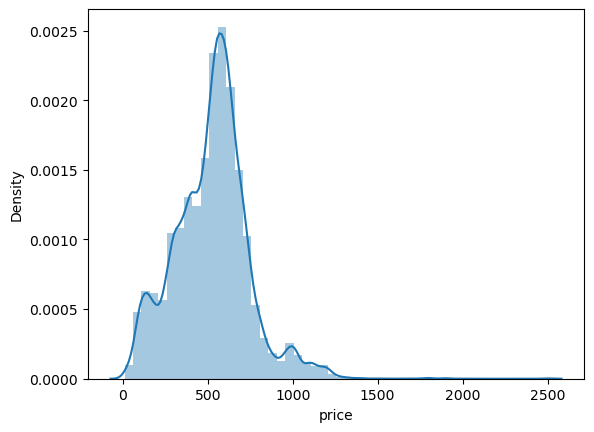

In [34]:
# Looking at the shape of the columns to be predicted (price)
sns.distplot(data['price'])

In [35]:
data['species_num'].value_counts()

species_num
0      736
12     736
86     736
9      735
56     735
      ... 
93      35
89      34
125     33
130     20
34       9
Name: count, Length: 138, dtype: int64

In [36]:
data['dayofweek'].value_counts()

dayofweek
5    4857
4    4834
0    4719
2    4712
3    4698
1    4681
6    4630
Name: count, dtype: int64

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33131 entries, 2022-01-01 to 2023-12-31
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mean_temp      33131 non-null  float32
 1   mean_humidity  33131 non-null  float32
 2   rain           33131 non-null  float32
 3   size           33131 non-null  int64  
 4   price          33131 non-null  float64
 5   species_num    33131 non-null  int32  
 6   dayofweek      33131 non-null  int32  
 7   quarter        33131 non-null  int32  
 8   month          33131 non-null  int32  
 9   year           33131 non-null  int32  
 10  dayofyear      33131 non-null  int32  
 11  dayofmonth     33131 non-null  int32  
 12  weekofyear     33131 non-null  UInt32 
dtypes: UInt32(1), float32(3), float64(1), int32(7), int64(1)
memory usage: 2.2 MB


In [38]:
# Using heatmap to see which features affect price the most

# Dropping weatehr_des from dataset coz it is categorical
# had np impact

data.corr()['price']

mean_temp       -0.280294
mean_humidity    0.205004
rain            -0.022599
size            -0.227074
price            1.000000
species_num     -0.085492
dayofweek        0.099237
quarter         -0.119656
month           -0.076248
year             0.265507
dayofyear       -0.078257
dayofmonth      -0.037934
weekofyear      -0.072729
Name: price, dtype: float64

<Axes: >

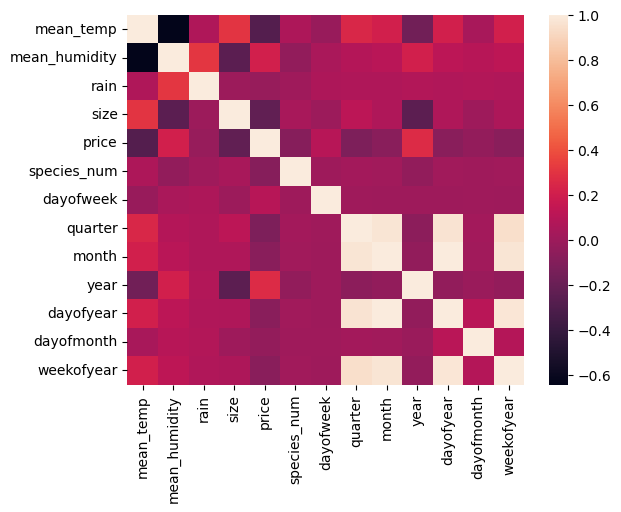

In [39]:
sns.heatmap(data.corr())

In [98]:
import pandas as pd

def add_rolling_averages(df_path="dataset_for_model.csv", output_path="dataset_with_rolling_averages.csv",
                         price_column="price", species_column="species_num",
                         date_column="date", windows=[3, 7, 30]):
    """
    Loads a dataset, calculates rolling averages of 'price' for each species,
    and saves the modified DataFrame to a new CSV file.

    Args:
        df_path (str): Path to the input CSV dataset.
        output_path (str): Path to save the output CSV with rolling averages.
        price_column (str): Name of the column containing price data.
        species_column (str): Name of the column identifying species.
        date_column (str): Name of the column containing date information.
        windows (list): List of window sizes for rolling averages (e.g., [3, 7, 30] for 3-day, 7-day, 30-day).
    
    Returns:
        pandas.DataFrame: The DataFrame with added rolling average columns.
                          Returns None if input file is not found.
    """
    try:
        df = pd.read_csv(df_path, parse_dates=[date_column])
        df.sort_values(by=[species_column, date_column], inplace=True)
    except FileNotFoundError:
        print(f"[ERROR] Input file '{df_path}' not found.")
        return None
    except Exception as e:
        print(f"[ERROR] An error occurred while loading or sorting the data: {e}")
        return None

    print(f"[INFO] Calculating rolling averages for '{price_column}' by '{species_column}'...")

    for window in windows:
        new_column_name = f'{price_column}_rolling_mean_{window}d'
        # Apply rolling mean grouped by species
        # min_periods=1 allows calculation even if fewer than 'window' periods are available
        # (e.g., for the first few days of a species' data)
        df[new_column_name] = df.groupby(species_column)[price_column].transform(
            lambda x: x.rolling(window=window, min_periods=1).mean()
        )
        print(f"[INFO] Added column: {new_column_name}")

    try:
        df.to_csv(output_path, index=False)
        print(f"[INFO] Dataset with rolling averages saved to '{output_path}'.")
    except Exception as e:
        print(f"[ERROR] An error occurred while saving the output file: {e}")

    return df

# --- This block must be at the top level of indentation ---
if __name__ == "__main__":
    print("--- Running Rolling Averages Utility ---")
    # Example usage:
    # This will create a new CSV file named 'dataset_with_rolling_averages.csv'
    # in the same directory as this script.
    modified_df = add_rolling_averages(
        df_path="dataset_for_model.csv",
        output_path="dataset_with_rolling_averages.csv", # Ensure output_path is provided
        windows=[3, 7, 14, 30] # You can specify different window sizes
    )

    if modified_df is not None:
        print("\n--- Head of the Modified Dataset (first 5 rows) ---")
        print(modified_df.head())
        print("\n--- Check new columns for a specific species (e.g., species_num=0) ---")
        print(modified_df[modified_df['species_num'] == 0].head(10)[['date', 'price', 'price_rolling_mean_3d', 'price_rolling_mean_7d']])
        data = modified_df
        
    else:
        print("Modified data is NULL. Check for errors above.")


--- Running Rolling Averages Utility ---
[INFO] Calculating rolling averages for 'price' by 'species_num'...
[INFO] Added column: price_rolling_mean_3d
[INFO] Added column: price_rolling_mean_7d
[INFO] Added column: price_rolling_mean_14d
[INFO] Added column: price_rolling_mean_30d
[INFO] Dataset with rolling averages saved to 'dataset_with_rolling_averages.csv'.

--- Head of the Modified Dataset (first 5 rows) ---
   Unnamed: 0       date  size   price  species_num  dayofweek  quarter  \
0           0 2022-01-01     1  804.11            0          5        1   
1          38 2022-01-02     1  873.68            0          6        1   
2          76 2022-01-03     1  780.68            0          0        1   
3         114 2022-01-04     1  754.79            0          1        1   
4         152 2022-01-05     1  729.62            0          2        1   

   month  year  dayofyear  dayofmonth  weekofyear  temperature  cloudiness  \
0      1  2022          1           1          52   

In [100]:
data.head()

,Unnamed: 0,date,size,price,species_num,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,temperature,cloudiness,humidity,wind_speed,price_rolling_mean_3d,price_rolling_mean_7d,price_rolling_mean_14d,price_rolling_mean_30d
0,0,2022-01-01,1,804.11,0,5,1,1,2022,1,1,52,32,0,49,23,804.110,804.110,804.110,804.110
1,38,2022-01-02,1,873.68,0,6,1,1,2022,2,2,52,32,0,49,23,838.895,838.895,838.895,838.895
2,76,2022-01-03,1,780.68,0,0,1,1,2022,3,3,1,32,0,49,23,819.490,819.490,819.490,819.490
3,114,2022-01-04,1,754.79,0,1,1,1,2022,4,4,1,32,0,49,23,803.050,803.315,803.315,803.315
4,152,2022-01-05,1,729.62,0,2,1,1,2022,5,5,1,32,0,49,23,755.030,788.576,788.576,788.576


<Axes: >

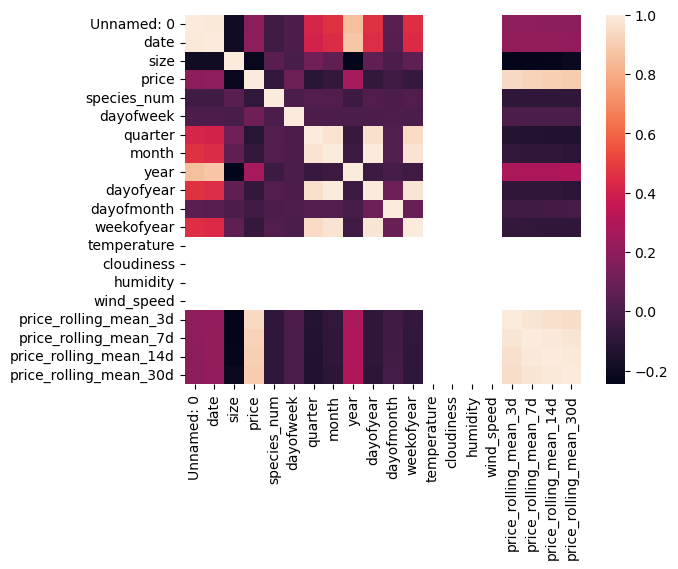

In [102]:
#-----
sns.heatmap(data.corr())

In [104]:
# ------ DATA DECOMPOSITION: DIVIDING DATA BASED ON SPECIES ----------

def split_species_data(data):
#    Splits the main dataset into separate DataFrames for each species_num.

    species_datasets = {} # A Single dictionary containing 138 dataframes for each species

    for species, group in data.groupby("species_num"):
        # Ensure sorting by date and keep date as a column
        group_sorted = group.sort_values("date").reset_index(drop=False)
        species_datasets[species] = group_sorted

    return species_datasets


species_datasets = split_species_data(data)

# sp_0 = species_datasets[0] --------- to Create separate dataframes

for species_id, df in species_datasets.items():
    print(f"Species {species_id} has {len(df)} rows.")


Species 0 has 736 rows.
Species 1 has 64 rows.
Species 2 has 63 rows.
Species 3 has 43 rows.
Species 4 has 733 rows.
Species 5 has 60 rows.
Species 6 has 54 rows.
Species 7 has 731 rows.
Species 8 has 52 rows.
Species 9 has 735 rows.
Species 10 has 62 rows.
Species 11 has 58 rows.
Species 12 has 736 rows.
Species 13 has 729 rows.
Species 14 has 63 rows.
Species 15 has 39 rows.
Species 16 has 61 rows.
Species 17 has 58 rows.
Species 18 has 63 rows.
Species 19 has 63 rows.
Species 20 has 63 rows.
Species 21 has 63 rows.
Species 22 has 35 rows.
Species 23 has 64 rows.
Species 24 has 54 rows.
Species 25 has 60 rows.
Species 26 has 52 rows.
Species 27 has 734 rows.
Species 28 has 64 rows.
Species 29 has 733 rows.
Species 30 has 708 rows.
Species 31 has 63 rows.
Species 32 has 733 rows.
Species 33 has 64 rows.
Species 34 has 9 rows.
Species 35 has 62 rows.
Species 36 has 731 rows.
Species 37 has 734 rows.
Species 38 has 730 rows.
Species 39 has 64 rows.
Species 40 has 37 rows.
Species 41 has

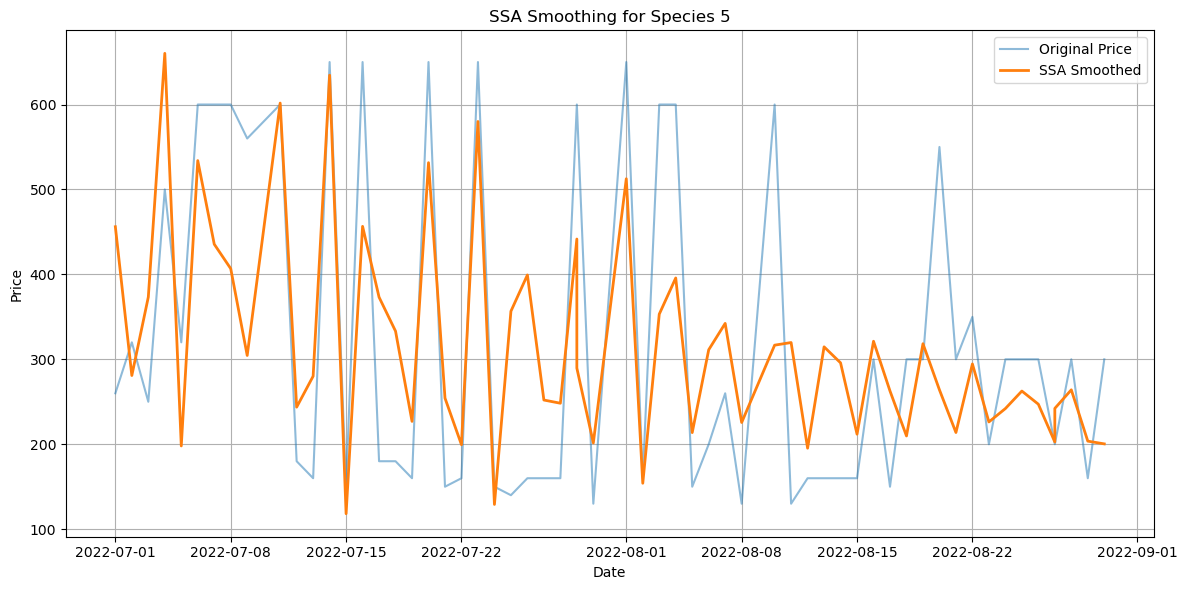

In [106]:
#--------- USING SSA TO SMOOTH OUT THE INDIVIDUAL DATASETS --------------------

species_id = 5  # Change this to any valid species_num
species_data = data[data["species_num"] == species_id].sort_values("date").reset_index(drop=False)

# SSA smoothing function
def ssa_smooth(series, window_length=30, n_components=5):
    series = np.array(series, dtype=float)
    N = len(series)

    if N < 3:
        return series

    window_length = min(window_length, N - 1)
    K = N - window_length + 1

    if K <= 1:
        return series

    # Embedding
    try:
        X = np.column_stack([series[i:i + K] for i in range(window_length)])
    except ValueError:
        return series  # Invalid shape due to tiny data

    #  SVD
    U, Sigma, VT = np.linalg.svd(X)

    #  Reconstruct first n_components
    r = min(n_components, len(Sigma))
    X_reconstructed = np.zeros_like(X)
    for i in range(r):
        X_reconstructed += Sigma[i] * np.outer(U[:, i], VT[i, :])

    #  Diagonal averaging
    reconstructed = np.zeros(N)
    counts = np.zeros(N)

    rows, cols = X_reconstructed.shape
    for i in range(rows):
        for j in range(cols):
            reconstructed[i + j] += X_reconstructed[i, j]
            counts[i + j] += 1

    return reconstructed / counts


# Apply SSA to all datasets in the species_datasets dictionary
def apply_ssa_to_all(species_datasets, window_length=30, n_components=5):
    for species, df in species_datasets.items():
        smoothed = ssa_smooth(df["price"].values, window_length, n_components)
        df["price_ssa"] = smoothed

        # Dealing with negative ssa_price values
        df['was_negative'] = df['price_ssa'].apply(lambda x: 1 if x < 0 else 0)
        df['price_ssa'] = df['price_ssa'].apply(lambda x: abs(x) / 1000 if x < 0 else x)

    return species_datasets

# Apply SSA
species_datasets = apply_ssa_to_all(species_datasets, window_length=20, n_components=5)


# Plot original vs smoothed
plt.figure(figsize=(12, 6))
plt.plot(species_data["date"], species_data["price"], label="Original Price", alpha=0.5)
plt.plot(species_data["date"], species_datasets[species_id]["price_ssa"], label="SSA Smoothed", linewidth=2)
plt.title(f"SSA Smoothing for Species {species_id}")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [107]:
sp_2 = species_datasets[2]
sp_2.head()

,index,Unnamed: 0,date,size,price,species_num,dayofweek,quarter,month,year,...,temperature,cloudiness,humidity,wind_speed,price_rolling_mean_3d,price_rolling_mean_7d,price_rolling_mean_14d,price_rolling_mean_30d,price_ssa,was_negative
0,800,7000,2022-07-01,1,750.0,2,4,3,7,2022,...,32,0,49,23,750.000000,750.000000,750.000000,750.000000,833.624513,0
1,801,7020,2022-07-02,3,250.0,2,5,3,7,2022,...,32,0,49,23,500.000000,500.000000,500.000000,500.000000,265.429205,0
2,802,7217,2022-07-03,1,300.0,2,6,3,7,2022,...,32,0,49,23,433.333333,433.333333,433.333333,433.333333,287.984705,0
3,803,7261,2022-07-04,2,300.0,2,0,3,7,2022,...,32,0,49,23,283.333333,400.000000,400.000000,400.000000,317.554391,0
4,804,7389,2022-07-05,1,750.0,2,1,3,7,2022,...,32,0,49,23,450.000000,470.000000,470.000000,470.000000,735.014458,0


In [108]:
sp_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   63 non-null     int64         
 1   Unnamed: 0              63 non-null     int64         
 2   date                    63 non-null     datetime64[ns]
 3   size                    63 non-null     int64         
 4   price                   63 non-null     float64       
 5   species_num             63 non-null     int64         
 6   dayofweek               63 non-null     int64         
 7   quarter                 63 non-null     int64         
 8   month                   63 non-null     int64         
 9   year                    63 non-null     int64         
 10  dayofyear               63 non-null     int64         
 11  dayofmonth              63 non-null     int64         
 12  weekofyear              63 non-null     int64       

C:\Users\aisha\AppData\Local\Temp\ipykernel_9384\744077624.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sp_2['price_ssa'])


<Axes: xlabel='price_ssa', ylabel='Density'>

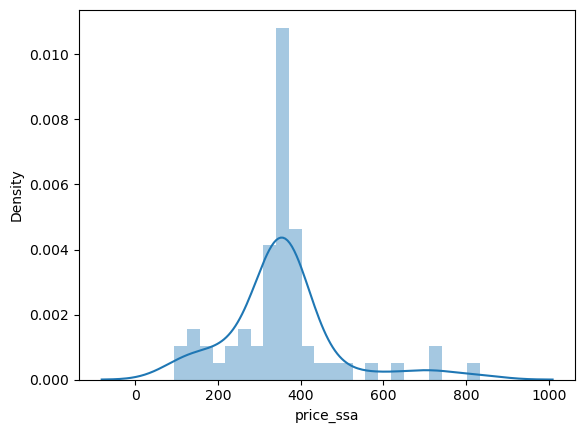

In [109]:
sns.distplot(sp_2['price_ssa'])

<Axes: >

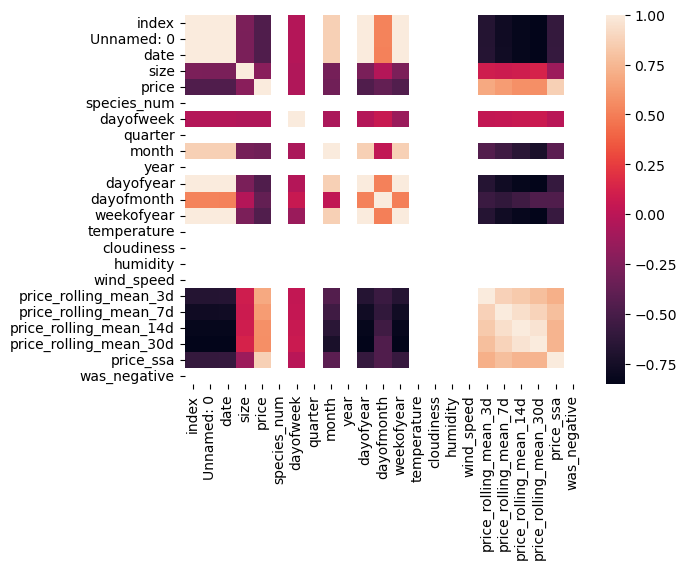

In [110]:
sns.heatmap(sp_2.corr())

In [120]:
# Exporting this Dataset, with Weather data, and Rolling average

modified_df.to_csv("dataset_for_model_2.csv", index=True)

In [122]:
#-------- EXPORTING DATASET: IT IS TO BE TRANSFORMWD FURTHER USING POWERBI -------

for x in range(138):
    sp = species_datasets[x]
    name = 'sp_'+str(x)+'.csv'
    sp.to_csv(name, index=True)
